### Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.datasets import imdb
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.utils import to_categorical

## **1. Import and analyse the data set.**

In [2]:
num_words = 10000  # ensures we only keep the top 10,000 most frequently occurring words in the training set
maxlen = 20
embedding_size = 50

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [4]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [5]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


## **2. Perform relevant sequence adding on the data**

In [6]:
X_train = pad_sequences(X_train,padding='post',maxlen=maxlen)
X_test = pad_sequences(X_test,padding='post',maxlen=maxlen)

## **3. Perform following data analysis:**

### **• Print shape of features and labels**

In [7]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(25000, 20) (25000,)
(25000, 20) (25000,)


### **• Print value of any one feature and it's label**

In [8]:
X_train[0]

array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32], dtype=int32)

In [9]:
y_train[0]

1

## **4. Decode the feature value to get original sentence**

In [10]:
word_index = imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2 
word_index["<UNUSED>"] = 3
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 0s 0us/step


In [11]:
decode_review(X_train[0])

"story was so lovely because it was true and was someone's life after all that was shared with us all"

In [12]:
decode_review(X_train[1])

"on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [13]:
decode_review(X_train[3])

'of storytelling and the age old question of whether there are some truths that cannot be told but only experienced'

## **5. Design, train, tune and test a sequential model.** 

### **neural network architecture using embedding and LSTM layers.**

In [14]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten
model = Sequential()
model.add(Embedding(num_words, embedding_size, input_length = maxlen ))
model.add(LSTM(128, return_sequences =True))

model.add(Flatten())

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 50)            500000    
_________________________________________________________________
lstm (LSTM)                  (None, 20, 128)           91648     
_________________________________________________________________
flatten (Flatten)            (None, 2560)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                40976     
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 632,641
Trainable params: 632,641
Non-trainable params: 0
__________________________________________________

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs =20 , batch_size=100)

Epoch 1/20
250/250 [==============================] - 23s 84ms/step - loss: 0.6154 - accuracy: 0.6310 - val_loss: 0.4790 - val_accuracy: 0.7650
Epoch 2/20
250/250 [==============================] - 20s 80ms/step - loss: 0.4018 - accuracy: 0.8220 - val_loss: 0.4896 - val_accuracy: 0.7656
Epoch 3/20
250/250 [==============================] - 20s 82ms/step - loss: 0.3154 - accuracy: 0.8606 - val_loss: 0.5246 - val_accuracy: 0.7561
Epoch 4/20
250/250 [==============================] - 20s 82ms/step - loss: 0.2444 - accuracy: 0.8922 - val_loss: 0.6410 - val_accuracy: 0.7512
Epoch 5/20
250/250 [==============================] - 20s 82ms/step - loss: 0.1795 - accuracy: 0.9223 - val_loss: 0.9045 - val_accuracy: 0.7385
Epoch 6/20
250/250 [==============================] - 21s 83ms/step - loss: 0.1286 - accuracy: 0.9443 - val_loss: 1.0812 - val_accuracy: 0.7393
Epoch 7/20
250/250 [==============================] - 20s 82ms/step - loss: 0.0974 - accuracy: 0.9582 - val_loss: 1.2065 - val_accuracy:

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

782/782 [==============================] - 7s 9ms/step - loss: 2.4949 - accuracy: 0.7259
0.7259200215339661


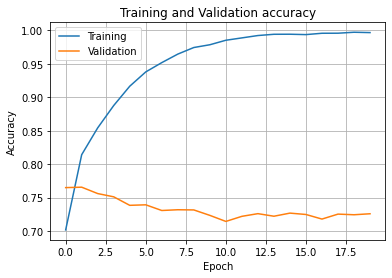

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='best')
plt.grid(True)

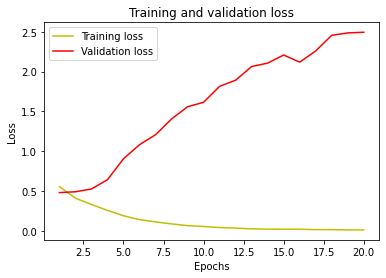

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **6. Use the designed model to print the prediction on any one sample.**

In [20]:
predict=model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [21]:
predict_classes=predict.reshape(len(X_test))

In [22]:
SentimentDict={1:'positive', 0:'negative'}

def display_test_sentiment(i):
    print(decode_review(X_test[i]))
    print(200* '-')
    print('label: ', SentimentDict[y_test[i]], ', prediction: ', SentimentDict[predict_classes[i]])

In [23]:
display_test_sentiment(1)

br br unfortunately it's very difficult to find in video stores you may have to buy it off the internet
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
label:  positive , prediction:  positive


In [24]:
display_test_sentiment(5)

movie doesn't deserve a cheap <UNK> it deserves the real thing i'm them now this movie will be on dvd
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
label:  positive , prediction:  negative


In [25]:
display_test_sentiment(0)

wasn't going to work out and his performance was quite <UNK> so all you madison fans give this a miss
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
label:  negative , prediction:  negative


## **Tried other models to check the performance**

# **IMDB Dataset predicion by using One-Dimensional Convolutional Neural Network Model**

In [26]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
model1 = Sequential()
model1.add(Embedding(num_words, embedding_size, input_length = maxlen ))
model1.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(250, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 50)            500000    
_________________________________________________________________
conv1d (Conv1D)              (None, 20, 32)            4832      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               80250     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 251       
Total params: 585,333
Trainable params: 585,333
Non-trainable params: 0
________________________________________________

In [27]:
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128, verbose=2)

Epoch 1/10
196/196 - 4s - loss: 0.5699 - accuracy: 0.6805 - val_loss: 0.4743 - val_accuracy: 0.7668
Epoch 2/10
196/196 - 3s - loss: 0.3671 - accuracy: 0.8341 - val_loss: 0.4881 - val_accuracy: 0.7652
Epoch 3/10
196/196 - 3s - loss: 0.2059 - accuracy: 0.9209 - val_loss: 0.5975 - val_accuracy: 0.7496
Epoch 4/10
196/196 - 3s - loss: 0.0656 - accuracy: 0.9806 - val_loss: 0.8899 - val_accuracy: 0.7442
Epoch 5/10
196/196 - 3s - loss: 0.0149 - accuracy: 0.9975 - val_loss: 1.0841 - val_accuracy: 0.7424
Epoch 6/10
196/196 - 3s - loss: 0.0033 - accuracy: 0.9998 - val_loss: 1.1995 - val_accuracy: 0.7458
Epoch 7/10
196/196 - 3s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.2818 - val_accuracy: 0.7472
Epoch 8/10
196/196 - 3s - loss: 0.0012 - accuracy: 0.9999 - val_loss: 1.3317 - val_accuracy: 0.7478
Epoch 9/10
196/196 - 3s - loss: 0.0013 - accuracy: 0.9999 - val_loss: 1.3645 - val_accuracy: 0.7472
Epoch 10/10
196/196 - 3s - loss: 0.0012 - accuracy: 0.9999 - val_loss: 1.4053 - val_accuracy: 0.7474

In [28]:
test_loss_model1, test_acc_model1 = model1.evaluate(X_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 1.4053 - accuracy: 0.7474


In [29]:
print(test_acc_model1)

0.7473599910736084


# **Simple Multi-Layer Model for the IMDB Dataset**

In [30]:
model2 = Sequential()
model2.add(Embedding(num_words, embedding_size, input_length = maxlen ))
model2.add(GlobalAveragePooling1D())
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 50)            500000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                816       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 500,833
Trainable params: 500,833
Non-trainable params: 0
_________________________________________________________________


In [32]:
 model2.fit(X_train, y_train, validation_data=(X_test,y_test), epochs =10 , batch_size=100)

Epoch 1/10
250/250 [==============================] - 3s 10ms/step - loss: 0.6591 - accuracy: 0.6517 - val_loss: 0.5014 - val_accuracy: 0.7567
Epoch 2/10
250/250 [==============================] - 2s 9ms/step - loss: 0.4424 - accuracy: 0.8020 - val_loss: 0.4786 - val_accuracy: 0.7695
Epoch 3/10
250/250 [==============================] - 2s 9ms/step - loss: 0.3728 - accuracy: 0.8425 - val_loss: 0.4962 - val_accuracy: 0.7639
Epoch 4/10
250/250 [==============================] - 2s 9ms/step - loss: 0.3476 - accuracy: 0.8528 - val_loss: 0.5204 - val_accuracy: 0.7602
Epoch 5/10
250/250 [==============================] - 2s 9ms/step - loss: 0.3121 - accuracy: 0.8734 - val_loss: 0.5441 - val_accuracy: 0.7545
Epoch 6/10
250/250 [==============================] - 2s 9ms/step - loss: 0.3040 - accuracy: 0.8759 - val_loss: 0.5721 - val_accuracy: 0.7485
Epoch 7/10
250/250 [==============================] - 2s 9ms/step - loss: 0.2870 - accuracy: 0.8853 - val_loss: 0.6020 - val_accuracy: 0.7472
Epoch

In [33]:
test_loss_model2, test_acc_model2 = model2.evaluate(X_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.6706 - accuracy: 0.7391


In [34]:
print(test_acc_model2)

0.7391200065612793


In [35]:
compare = [[test_acc],[test_acc_model1],[test_acc_model2]]
pd.DataFrame(compare, columns= ['Accuracy'], index = ['LSTM','CONV1D','Simple Multi-Layer Model'])

,Accuracy
LSTM,0.72592
CONV1D,0.74736
Simple Multi-Layer Model,0.73912
